<a href="https://colab.research.google.com/github/CaseySobon/Variational-autoencoder-VAE/blob/main/VAE_1_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('data1.csv')
df.info()

In [ ]:
#remove the NaN
df = df.dropna()

In [ ]:
#drop the class column
df=df.drop('Class', axis=1)


In [ ]:
#Make an numpy array for calculations
import numpy as np

Input = df.to_numpy()

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(Input, test_size=0.1, random_state=42)
print(x_train.shape)
print(x_test.shape)

(256326, 28)
(28481, 28)


In [ ]:
from keras.layers import Input,Dense
from keras.models import Model
import tensorflow as tf

In [ ]:
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
                  tf.keras.layers.Dense(16, activation="relu"),
                  #tf.keras.layers.Dense(8, activation="relu"),
                  #tf.keras.layers.Dense(4, activation="relu"),
                  tf.keras.layers.Dense(2, activation="relu")
              ])
    self.decoder = tf.keras.Sequential([
                  #tf.keras.layers.Dense(4, activation="relu"),
                  #tf.keras.layers.Dense(8, activation="relu"),
                  tf.keras.layers.Dense(16, activation="relu"),
                  tf.keras.layers.Dense(28, activation="sigmoid")
              ])
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
model = AutoEncoder()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=2, mode="min")
model.compile(optimizer='adadelta', loss='binary_crossentropy')
history = model.fit(x_train, x_train,
                    epochs=50,
                    batch_size=120,
                    shuffle=True,
                    callbacks=[early_stopping]
                    )

Epoch 1/50
2137/2137 [==============================] - 6s 3ms/step - loss: 0.6872
Epoch 2/50
2137/2137 [==============================] - 5s 2ms/step - loss: 0.6788
Epoch 3/50
2137/2137 [==============================] - 5s 2ms/step - loss: 0.6698
Epoch 4/50
2137/2137 [==============================] - 5s 2ms/step - loss: 0.6602
Epoch 5/50
2137/2137 [==============================] - 5s 2ms/step - loss: 0.6502
Epoch 6/50
2137/2137 [==============================] - 5s 2ms/step - loss: 0.6396
Epoch 7/50
2137/2137 [==============================] - 4s 2ms/step - loss: 0.6286
Epoch 8/50
2137/2137 [==============================] - 5s 2ms/step - loss: 0.6171
Epoch 9/50
2137/2137 [==============================] - 5s 2ms/step - loss: 0.6052
Epoch 10/50
2137/2137 [==============================] - 5s 2ms/step - loss: 0.5927
Epoch 11/50
2137/2137 [==============================] - 5s 2ms/step - loss: 0.5796
Epoch 12/50
2137/2137 [==============================] - 5s 2ms/step - loss: 0.5661
E

In [ ]:
encoder_out = model.encoder(x_test).numpy() #2 unit representation of data
decoder_out = model.decoder(encoder_out).numpy()

In [ ]:
for i in range(10):
  print(encoder_out[i])


[ 0.34730738 15.686059  ]
[0.        4.3598804]
[0.        3.2165682]
[1.8634523 5.5486035]
[0.      4.97992]
[0.        5.2670355]
[0.       4.759046]
[0.9434626 9.0688505]
[0.        8.9642725]
[ 0.    11.609]


891/891 [==============================] - 1s 1ms/step


(array([9.000e+00, 4.200e+01, 1.070e+02, 1.710e+02, 2.370e+02, 5.150e+02,
        7.100e+02, 8.740e+02, 1.148e+03, 1.443e+03, 1.663e+03, 1.722e+03,
        1.981e+03, 2.126e+03, 2.078e+03, 2.068e+03, 1.841e+03, 1.578e+03,
        1.439e+03, 1.228e+03, 1.015e+03, 9.830e+02, 8.100e+02, 6.180e+02,
        5.000e+02, 3.790e+02, 2.780e+02, 2.240e+02, 1.870e+02, 1.610e+02,
        7.800e+01, 7.000e+01, 5.700e+01, 3.300e+01, 3.300e+01, 2.100e+01,
        1.200e+01, 1.000e+01, 1.100e+01, 3.000e+00, 3.000e+00, 5.000e+00,
        2.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00]),
 array([0.47197832, 0.6204835 , 0.76898867, 0.91749385, 1.06599902,
        1.2145042 , 1.36300937, 1.51151455, 1.66001972, 1.8085249 ,
        1.95703008, 2.10553525, 2.25404043, 2.4025456 , 2.55105078,
        2.69955595, 2.84806113, 2.9965663 , 3.14507148, 3.29357666,
        3.44208183, 3.59058701, 3.73909218, 3.88759736, 4.03610253,
        4.18460771, 4.33311288, 4.48

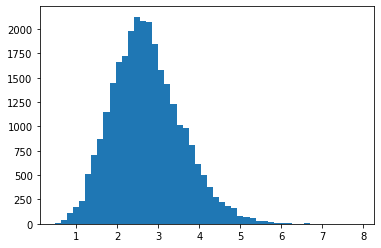

In [ ]:
import matplotlib.pyplot as plt

reconstruction = model.predict(x_test)
train_loss = tf.keras.losses.binary_crossentropy(reconstruction, x_test)
plt.hist(train_loss, bins=50)

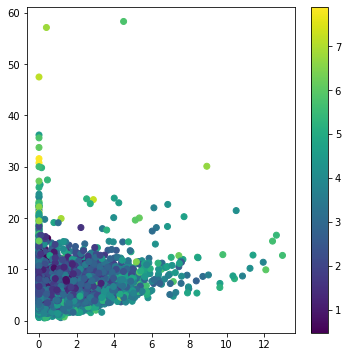

In [ ]:

plt.figure(figsize=(6, 6))
plt.scatter(encoder_out[:, 0], encoder_out[:, 1],c=train_loss)
plt.colorbar()
plt.show()